In [50]:
from tensorflow import keras
from tensorflow.keras import layers

In [51]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [52]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences): 
        for j in sequence: 
            results[i, j] = 1. 
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [53]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [54]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

In [55]:
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [56]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [57]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3981 - loss: 3.2438 - val_accuracy: 0.6280 - val_loss: 1.8333
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6671 - loss: 1.6250 - val_accuracy: 0.6960 - val_loss: 1.3879
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7379 - loss: 1.2306 - val_accuracy: 0.7450 - val_loss: 1.1970
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7932 - loss: 0.9744 - val_accuracy: 0.7640 - val_loss: 1.0983
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8230 - loss: 0.8158 - val_accuracy: 0.7870 - val_loss: 1.0290
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8557 - loss: 0.6898 - val_accuracy: 0.7820 - val_loss: 0.9852
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8848 - loss: 0.5658 - val_accuracy: 0.8090 - val_loss: 0.9197
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9028 - loss: 0.4746 - val_accuracy: 0.8120 - val_loss:

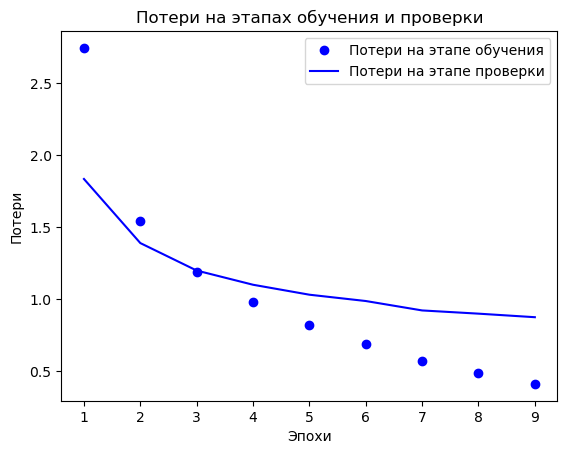

In [58]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

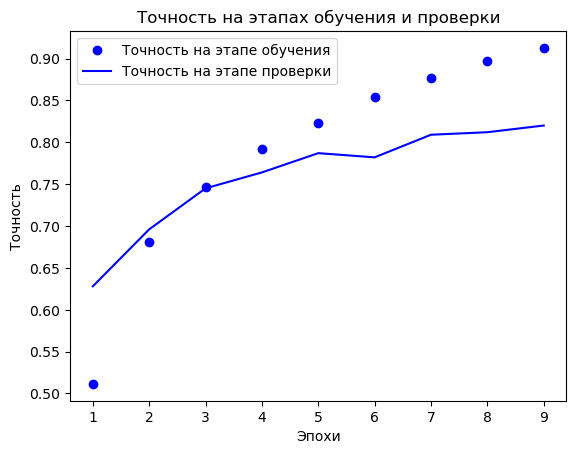

In [59]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_acc, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.legend()
plt.show()